In [8]:
import numpy as np
import pandas as pd
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

df = pd.read_csv('C:/Users/Progressive/Downloads/data.csv')
df.head()

,Temp,Humd,Label
0,25,58,1
1,25,59,1
2,25,60,1
3,25,64,1
4,25,64,1


In [11]:
#check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Temp     0
Humd     0
Label    0
dtype: int64


In [12]:
#remove duplicated values
df = df.drop_duplicates()

# prepare features
x = df.drop(['Label'],axis=1) #remove class or label
y = df['Label'] #load label

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2)
  

In [13]:
import pandas as pd
import numpy as np

# Assume x_train and y_train are DataFrames
new_samples = pd.DataFrame({
    'Temp': np.random.randint(20, 30, size=5),
    'Humd': np.random.randint(50, 90, size=5),
    'Label': 0  # New class
})
x_train = pd.concat([x_train, new_samples[['Temp', 'Humd']]])
y_train = pd.concat([y_train, new_samples['Label']])

In [14]:
z = KNeighborsClassifier(n_neighbors=3) # KNN classifier for 3 neighbours
KNN = z.fit(x_train,y_train) # start training

predict = KNN.predict(x_test) # performance in the test set   

z_1 = SVC(kernel='linear') #SVC Classifier for linear kernel
SVM = z_1.fit(x_train,y_train) # start training
predict_1 = SVM.predict(x_test) # performance in the test set

z_2 = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42) # Decision Tree Classifier for gini criterion
DTC = z_2.fit(x_train,y_train) # start training
predict_2 = DTC.predict(x_test) # performance in the test set



In [15]:
results = []

#knn metrics
results.append({
    "Model": "KNN",
    "Accuracy": metrics.accuracy_score(y_test, predict),
    "Precision": metrics.precision_score(y_test, predict, average='weighted', zero_division=1),
    "Recall": metrics.recall_score(y_test, predict, average='weighted'),
    "F1 Score": metrics.f1_score(y_test, predict, average='weighted')
})

# SVM Metrics
results.append({
    "Model": "SVM",
    "Accuracy": metrics.accuracy_score(y_test, predict_1),
    "Precision": metrics.precision_score(y_test, predict_1, average='weighted', zero_division=1),
    "Recall": metrics.recall_score(y_test, predict_1, average='weighted'),
    "F1 Score": metrics.f1_score(y_test, predict_1, average='weighted')
})

# Decision Tree Metrics
results.append({
    "Model": "Decision Tree",
    "Accuracy": metrics.accuracy_score(y_test, predict_2),
    "Precision": metrics.precision_score(y_test, predict_2, average='weighted', zero_division=1),
    "Recall": metrics.recall_score(y_test, predict_2, average='weighted'),
    "F1 Score": metrics.f1_score(y_test, predict_2, average='weighted')
})

# Convert to DataFrame for display
results_df = pd.DataFrame(results)

# Print Metrics Table
print(results_df)

           Model  Accuracy  Precision    Recall  F1 Score
0            KNN  1.000000        1.0  1.000000  1.000000
1            SVM  0.954545        1.0  0.954545  0.976744
2  Decision Tree  0.954545        1.0  0.954545  0.976744


c:\Users\Progressive\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Progressive\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


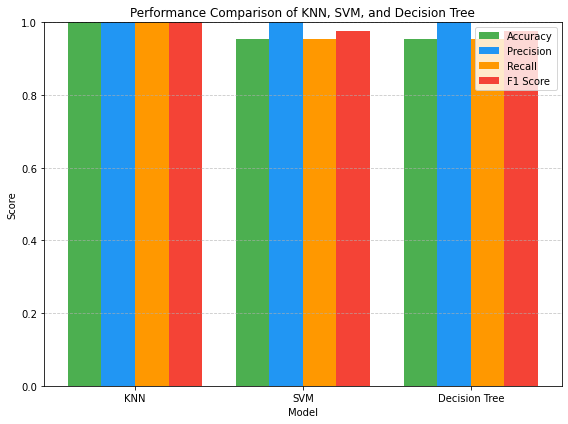

In [16]:
import matplotlib.pyplot as plt
# Plot Metrics for All Models
metrics_list = ["Accuracy", "Precision", "Recall", "F1 Score"]
colors = ['#4caf50', '#2196f3', '#ff9800', '#f44336']

plt.figure(figsize=(8, 6))
for i, metric in enumerate(metrics_list):
    plt.bar(
        [r + i * 0.2 for r in range(len(results_df))], 
        results_df[metric], 
        width=0.2, 
        label=metric, 
        color=colors[i]
    )

# Graph settings
plt.title("Performance Comparison of KNN, SVM, and Decision Tree")
plt.xticks([r + 0.3 for r in range(len(results_df))], results_df["Model"])
plt.ylim(0, 1)  # Since metrics are between 0 and 1
plt.ylabel("Score")
plt.xlabel("Model")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()